In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import sys
sys.path.append("../")

import json
from vision_transformer import ViT, Trainer
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as v2
from torch.utils.data import Subset, DataLoader

In [25]:
dataset = CIFAR10(root="../data", download=True, transform=v2.ToTensor())
dataset = Subset(dataset, range(1))

dataloader = DataLoader(dataset, batch_size=1)

Files already downloaded and verified


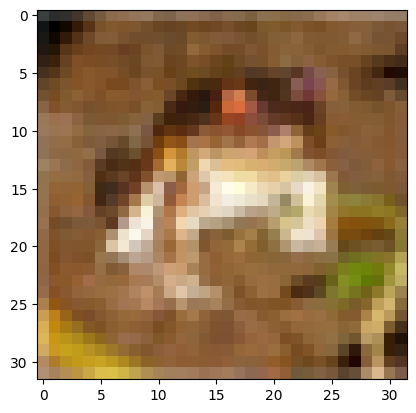

In [26]:
plt.imshow(dataset[0][0].permute(1, 2, 0))

In [27]:
MODEL_CONFIG = "../configs/default.json"

with open(MODEL_CONFIG, "r") as f:
    model_config = json.load(f)

model_config

{'image_size': 32,
 'channels': 3,
 'patch_size': 4,
 'dim': 32,
 'layers': 4,
 'heads': 2,
 'mlp_dim': 64,
 'num_classes': 10}

In [28]:
vit = ViT(**model_config)
vit

ViT(
  (patch_embedding): Conv2d(3, 32, kernel_size=(4, 4), stride=(4, 4))
  (transformer): Transformer(
    (encoders): ModuleList(
      (0-3): 4 x TransformerEncoder(
        (mha): MultiHeadAttention(
          (to_qkv): Linear(in_features=32, out_features=384, bias=True)
          (out): Linear(in_features=128, out_features=32, bias=True)
        )
        (layer_norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (layer_norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (mlp): Sequential(
            (0): Linear(in_features=32, out_features=64, bias=True)
            (1): GELU(approximate='none')
            (2): Linear(in_features=64, out_features=32, bias=True)
          )
        )
      )
    )
  )
  (layernorm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  (mlp): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=10, bias=True)


In [29]:
trainer = Trainer(
    model=vit,
    train_loader=dataloader,
    epochs=1000
)

In [30]:
train_result = trainer.train()

training...


100%|██████████| 1000/1000 [00:29<00:00, 33.96it/s, epoch=999, loss=0.00629, train_accuracy=1, val_loss=N/A, val_accuracy=0]


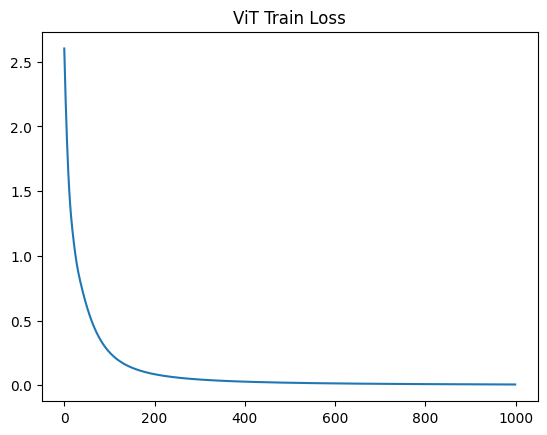

In [31]:
plt.title("ViT Train Loss")
plt.plot(train_result["losses"])